#Project17-To perform EDA and predict the fares of flights on the basis of many other factors

In [37]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [38]:
train=pd.read_excel('C:/Users/Arjun Rao/Downloads/flight/Data_Train.xlsx',parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
test=pd.read_excel('C:/Users/Arjun Rao/Downloads/flight/Test_set.xlsx',parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
train['type']='train'
test['type']='test'

In [39]:
df_flight=pd.concat([train,test])
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,type
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-29 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-29 13:15:00,2019-01-05,2020-04-29 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-04-29 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-29 23:30:00,2019-12-05,2020-04-29 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-29 21:35:00,2019-01-03,2020-04-29 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-04-29 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
2667,No info,IndiGo,2020-04-29 16:55:00,2019-03-27,2020-04-29 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
2668,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-04-29 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
2669,No info,Air India,2020-04-29 19:15:00,2019-06-03,2020-04-29 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [40]:
train.shape, test.shape

((10683, 12), (2671, 11))

In [41]:
#Resetting the index inorder to make our data clean and easier to understand
df_flight.reset_index(drop=True,inplace=True)

In [42]:
df_flight.tail()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,type
13349,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-04-29 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2020-04-29 16:55:00,2019-03-27,2020-04-29 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-04-29 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2020-04-29 19:15:00,2019-06-03,2020-04-29 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13353,No info,Multiple carriers,2020-04-29 19:15:00,2019-06-15,2020-04-29 04:55:00,Cochin,14h 20m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [43]:
#Checking for null values
df_flight.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
type                  0
dtype: int64

In [44]:
#Checking datatypes
df_flight.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
type                       object
dtype: object

In [45]:
#Changing hours,minutes format to minutes and hours
df_flight['Duration']=  df_flight['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [47]:
df_flight['Duration']=df_flight['Duration']/60

In [50]:
pd.options.display.float_format = '{:.2f}'.format

In [53]:
#Checking uniques of object datatypes columns to improve
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785

In [54]:
#Coorecting some unique values in these object data
df_flight["Destination"].replace("New Delhi","Delhi",inplace=True)
df_flight["Additional_Info"].replace("No Info","No info",inplace=True)

In [55]:
df_flight["Total_Stops"].replace("non-stop","0 stop",inplace=True)

In [61]:
#Removing stops and stop from Total_stops column to make it int type
df_flight["Total_Stops"]=df_flight["Total_Stops"].str.strip("stop")

In [64]:
#Dropping  unimportant cloumns
df_flight.drop(columns=['Arrival_Time'],axis=1,inplace=True)

In [67]:
df_flight.drop(columns=["Date_of_Journey","Route"],inplace=True)

In [65]:
df_flight["time_of_day"]=np.where((df_flight["Dep_Time"].dt.hour>=0)&(df_flight["Dep_Time"].dt.hour<=2),"Late Night",
                                  np.where((df_flight["Dep_Time"].dt.hour>=3)&(df_flight["Dep_Time"].dt.hour<=7),"Early Morning",
                                           np.where((df_flight["Dep_Time"].dt.hour>=8)&(df_flight["Dep_Time"].dt.hour<=11),"Morning",
                                                    np.where((df_flight["Dep_Time"].dt.hour>=12)&(df_flight["Dep_Time"].dt.hour<=16),"Afternoon",
                                                             np.where((df_flight["Dep_Time"].dt.hour>=17)&(df_flight["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [68]:
df_flight.head(5)

,Additional_Info,Airline,Dep_Time,Destination,Duration,Price,Source,Total_Stops,type,time_of_day
0,No info,IndiGo,2020-04-29 22:20:00,Delhi,2.83,3897.00,Banglore,0,train,Night
1,No info,Air India,2020-04-29 05:50:00,Banglore,7.42,7662.00,Kolkata,2,train,Early Morning
2,No info,Jet Airways,2020-04-29 09:25:00,Cochin,19.00,13882.00,Delhi,2,train,Morning
3,No info,IndiGo,2020-04-29 18:05:00,Banglore,5.42,6218.00,Kolkata,1,train,Evening
4,No info,IndiGo,2020-04-29 16:50:00,Delhi,4.75,13302.00,Banglore,1,train,Afternoon


We can see that we have now the needed data to perfom EDA and to train our model for prediction

--Performing graphical EDA for the above data to get insight of data--

In [70]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

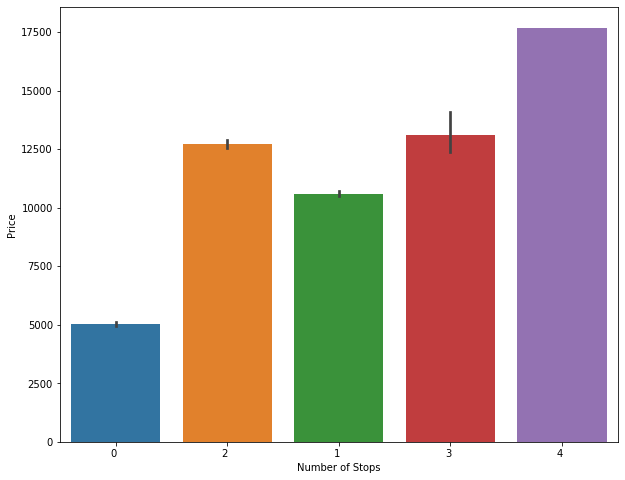

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(x="Total_Stops",y="Price",data=df_flight)
plt.xlabel('Number of Stops')
plt.show()

We can see that Prices of flight with more number of stops are more

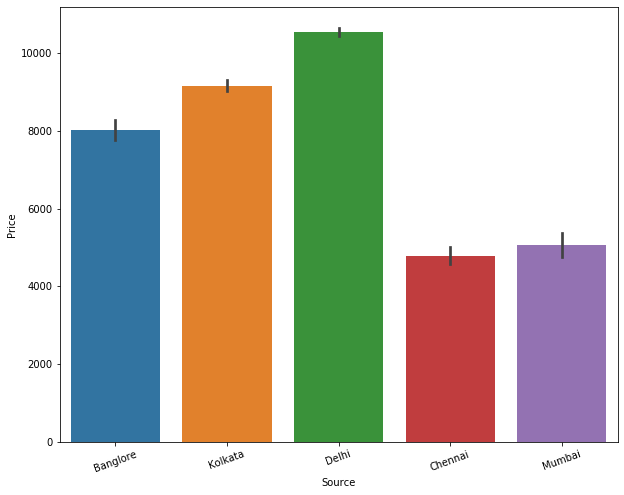

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(x="Source",y="Price",data=df_flight)
plt.xticks(rotation=20)
plt.show()

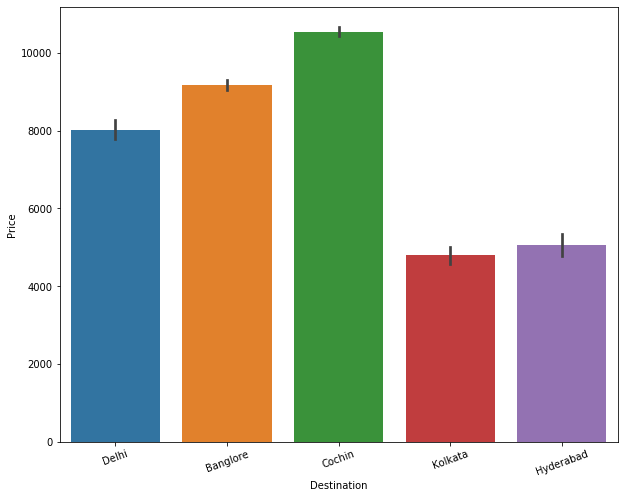

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x="Destination",y="Price",data=df_flight)
plt.xticks(rotation=20)
plt.show()

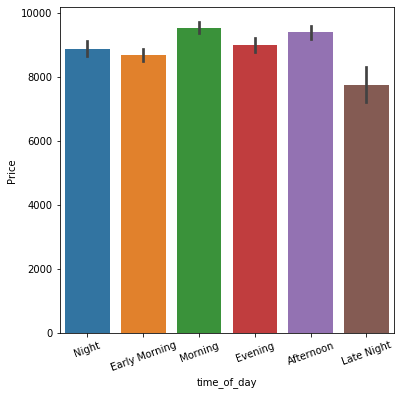

In [76]:
plt.figure(figsize=(6,6))
sns.barplot(x="time_of_day",y="Price",data=df_flight)
plt.xticks(rotation=20)
plt.show()

We can see that late night flights are bit cheaper as compared to others

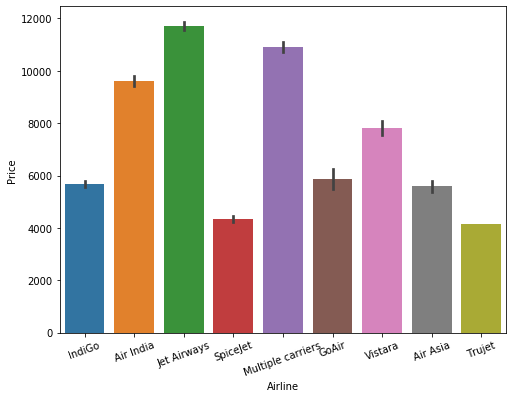

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.xticks(rotation=20)
plt.show()

We can see that Spicejet and Trujet are the best flight in terms of price

In [78]:
pd.pivot_table(df_flight,index=['Airline'],values='Price',aggfunc=[np.mean,np.median,min,max])

,mean,median,min,max
,Price,Price,Price,Price
Airline,,,,
Air Asia,5590.26,5162.00,3383.00,13774.00
Air India,9611.21,9443.00,2050.00,31945.00
GoAir,5861.06,5135.00,3398.00,22794.00
IndiGo,5673.68,5000.00,2227.00,22153.00
Jet Airways,11716.63,11467.00,1840.00,79512.00
Multiple carriers,10908.23,10197.00,5797.00,36983.00
SpiceJet,4338.28,3873.00,1759.00,23267.00
Trujet,4140.00,4140.00,4140.00,4140.00


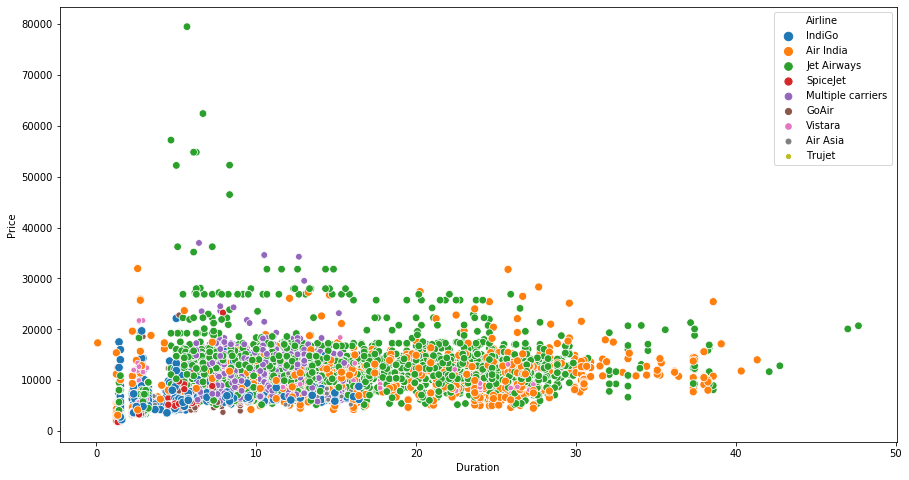

In [88]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Duration",y="Price",hue='Airline',size='Airline',data=df_flight)
plt.show()

In [89]:
#Encoding categorical data types using one hot encoder
df_flight_new=pd.get_dummies(df_flight,columns=["Additional_Info","Airline","Destination","Source","time_of_day"],drop_first=True)

In [90]:
df_flight_new.shape

(13354, 34)

In [97]:
df_flight_new.drop(columns=["Dep_Time"],inplace=True)

In [98]:
df_flight_new.head()

,Duration,Price,Total_Stops,type,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,...,Destination_Kolkata,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2.83,3897.00,0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7.42,7662.00,2,train,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,19.00,13882.00,2,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.42,6218.00,1,train,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,4.75,13302.00,1,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#Separating test and train data
df_train=df_flight_new.loc[df_flight_new["type"]=="train"]
df_test=df_flight_new.loc[df_flight_new["type"]=="test"]

In [127]:
#Dropping the type column
df_test.drop(columns=["type","Price"],inplace=True)

In [125]:
df_train.drop(columns=["type"],inplace=True)

In [128]:
#Separating the input and output from train dataset
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [129]:
#Performing scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [130]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [131]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [132]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [133]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,random_state=42)

In [135]:
LR=LinearRegression()
maxr2_score(LR,x,y)

max r2 score is :  0.6785527689841898 corresponding to random state:  58


In [136]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,y)

max r2 score is :  0.7613434138435065 corresponding to random state:  77


In [137]:
RF=RandomForestRegressor()
maxr2_score(RF,x,y)

max r2 score is :  0.7549174229824344 corresponding to random state:  77


In [138]:
AB=AdaBoostRegressor()
maxr2_score(AB,x,y)

max r2 score is :  0.6180570305918172 corresponding to random state:  87


In [139]:
GB=GradientBoostingRegressor()
maxr2_score(GB,x,y)

max r2 score is :  0.7374896435879748 corresponding to random state:  77


In [148]:
#Using Grid search CV for best parameters to improve the r2 score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
RF=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500],'max_features':['auto', 'sqrt'],
             'min_samples_split':[2, 5, 10],'min_samples_leaf': [1,2, 5]}
clf = GridSearchCV(RF, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [149]:
RF=RandomForestRegressor(n_estimators=100,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split=10)
maxr2_score(RF,x,y)

max r2 score is :  0.7809155813334605 corresponding to random state:  77


We can see that we have imporved r2 score and maximum is given by Random Forest technuque

In [150]:
c_scores=cross_val_score(RF,x,y,cv=5,scoring="r2")
print("Mean r2 score for regressor: ",c_scores.mean())
print("standard deviation in r2 score for regressor: ",c_scores.std())

Mean r2 score for regressor:  0.7345622972996375
standard deviation in r2 score for regressor:  0.014720613780043293


In [153]:
#Saving our final model using Gradient Boosting Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=77,test_size=0.20)
RF.fit(train_x,train_y)
pred_fare=RF.predict(df_test)

In [154]:
pred_fare=pd.DataFrame(pred_fare,columns=["Price"])

In [155]:
#saving our predicted COST column to the system

pred_fare.to_csv('C:/Users/Arjun Rao/Downloads/predicted_fares.csv',index=False)

**This is we have saved the prdicted food cost file to the system**